# MLP Regressor

MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer.
Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn
from sklearn import datasets

# Import the libraries for performing classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, ShuffleSplit

In [2]:
np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

### Load dataset

Let us use the California Housing dataset for the demo of MLPRegressor

In [3]:
# Load dataset
dataset = sklearn.datasets.fetch_california_housing()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=1)

In [4]:
print ('Shape of training data', X_train.shape)
print ('Shape of testing data', X_test.shape)

Shape of training data (16512, 8)
Shape of testing data (4128, 8)


## Fit a pipeline to implement MLPRegressor on California housing dataset

In [5]:
pipe = Pipeline(
    [("scaler", StandardScaler()), ("regressor", MLPRegressor(hidden_layer_sizes=(32)))]
)

cv_results = cross_validate(
    pipe,
    X_train,
    y_train,
    cv=cv,
    scoring="neg_mean_absolute_percentage_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2,
)

mlp_train_error = -1 * cv_results["train_score"]
mlp_test_error = -1 * cv_results["test_score"]


print(
    f"Mean absolute error of linear regression model on the train set:\n"
    f"{mlp_train_error.mean():.3f} +/- {mlp_train_error.std():.3f}"
)
print(
    f"Mean absolute error of linear regression model on the test set: \n"
    f"{mlp_test_error.mean():.3f} +/- {mlp_test_error.std():.3f}"
)

Mean absolute error of linear regression model on the train set:
0.213 +/- 0.004
Mean absolute error of linear regression model on the test set: 
0.213 +/- 0.005


In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [7]:
mean_absolute_percentage_error(y_train, pipe.predict(X_train) )

0.20517616916407086

In [8]:
mean_absolute_percentage_error(y_test, pipe.predict(X_test) )

0.2168016418688319

Text(0, 0.5, 'predicted')

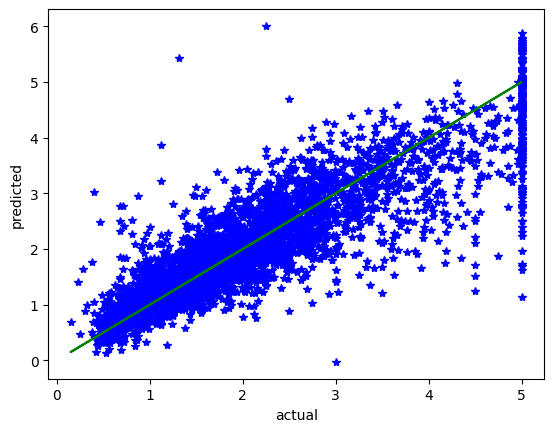

In [9]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')
plt.xlabel('actual')
plt.ylabel('predicted')